# 0. Import Libraries

In [2]:
import os
import locale
import requests

from bs4 import BeautifulSoup
from datetime import datetime
from PIL import Image, ImageDraw, ImageFont

## Set Locale
locale.setlocale(locale.LC_ALL, 'pt_BR')

## Day
today = datetime.today().strftime('%d.%m.%Y')

## Paths
#base_path = r'Grupo GCB\GCB CAPITAL - Documentos\Investimentos\GCB Capital1'
base_path = r'Grupo GCB\GCB CAPITAL - Investimentos\GCB Capital1'
#base_path = r'OneDrive - Grupo GCB'

backoffice_path = os.path.join(os.path.expanduser("~"), base_path + r"\Backoffice")

image_path = os.path.join(os.path.expanduser("~"), backoffice_path + r"\Conteudo_Divulgacao\Templates")
saving_path = os.path.join(os.path.expanduser("~"), backoffice_path + r"\Conteudo_Divulgacao\Imagens\Fechamentos_Diarios")


print(today)
print(backoffice_path)
print(image_path)
print(saving_path)

# 1. Collect Close Data

In [3]:
def get_values(url):
    
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    ## Last value
    elements = soup.find_all(class_= "YMlKec fxKbKc") 
    for element in elements[:1]:
        # print(element.get_text())
        last = float(element.get_text().replace(',', ''))
    
    ## Close value - nested search
    outer_elements = soup.find_all(class_='gyFHrc')
    for outer in outer_elements[:1]:
        inner_elements = outer.find_all(class_='P6K39c')
        for inner in inner_elements[:]:
            # print(inner.get_text())
            close = float(inner.get_text().replace(',', ''))
    
    ## Getting the % value
#     pct_change = str(round((last/close - 1) * 100, 2)).replace('.', ',') + '%'
    pct_change = locale.format_string("%.2f", round((last/close - 1) * 100, 2), grouping=True) + '%'
    
    return locale.format_string("%.2f", last, grouping=True), pct_change

In [4]:
ibov = 'https://www.google.com/finance/quote/IBOV:INDEXBVMF'
smll = ''
dolar = ''
ifix = 'https://www.google.com/finance/quote/IFIX:INDEXBVMF'
spx = 'https://www.google.com/finance/quote/.INX:INDEXSP'
nsdq = 'https://www.google.com/finance/quote/.IXIC:INDEXNASDAQ'

In [5]:
ibov_last, ibov_pct = get_values(ibov)
smll_last, smll_pct = '30.000,00', '1,00%'
dolar_last, dolar_pct = 'R$ 5,40', '0,10%'
ifix_last, ifix_pct = get_values(ifix)
spx_last, spx_pct = get_values(spx)
nsdq_last, nsdq_pct = get_values(nsdq)

selic = '10,50%'

# 2. Manipulate Template

O template do Fechamento Diário é puxado e são adicionados os dados nas posições respectivas

In [6]:
def add_text_to_image(img, text, position, font_text='arial', font_size=29, text_color='blue'):
    ## Get color
    colors = {'blue': '#183851', 'gold': '#CA9E67'}
    
    if text_color in colors.keys():
        color = colors[text_color]
    else:
        color = text_color

    # Create a drawing context
    draw = ImageDraw.Draw(img)

    # Set the font and color for the text
    font = ImageFont.truetype(font_text, font_size)
    draw.text(position, text, fill=color, anchor="mm", font=font)

    # Save the modified image as a new file
    return img

In [7]:
def var_movement(value_var):
    try:
        value_var = float(value_var.replace(',', '.').replace('%', ''))
    except:
        pass
    
    
    if isinstance(value_var, float) and value_var > 0:
        return '\u25B2'
    elif isinstance(value_var, float) and value_var < 0:
        return '\u25BC'
    else:
        return ''

In [8]:
def var_color(value_var):
    try:
        value_var = float(value_var.replace(',', '.').replace('%', ''))
    except:
        pass
    
    if isinstance(value_var, float) and value_var > 0:
        return 'green'
    elif isinstance(value_var, float) and value_var < 0 :
        return 'red'
    else:
        return 'blue'

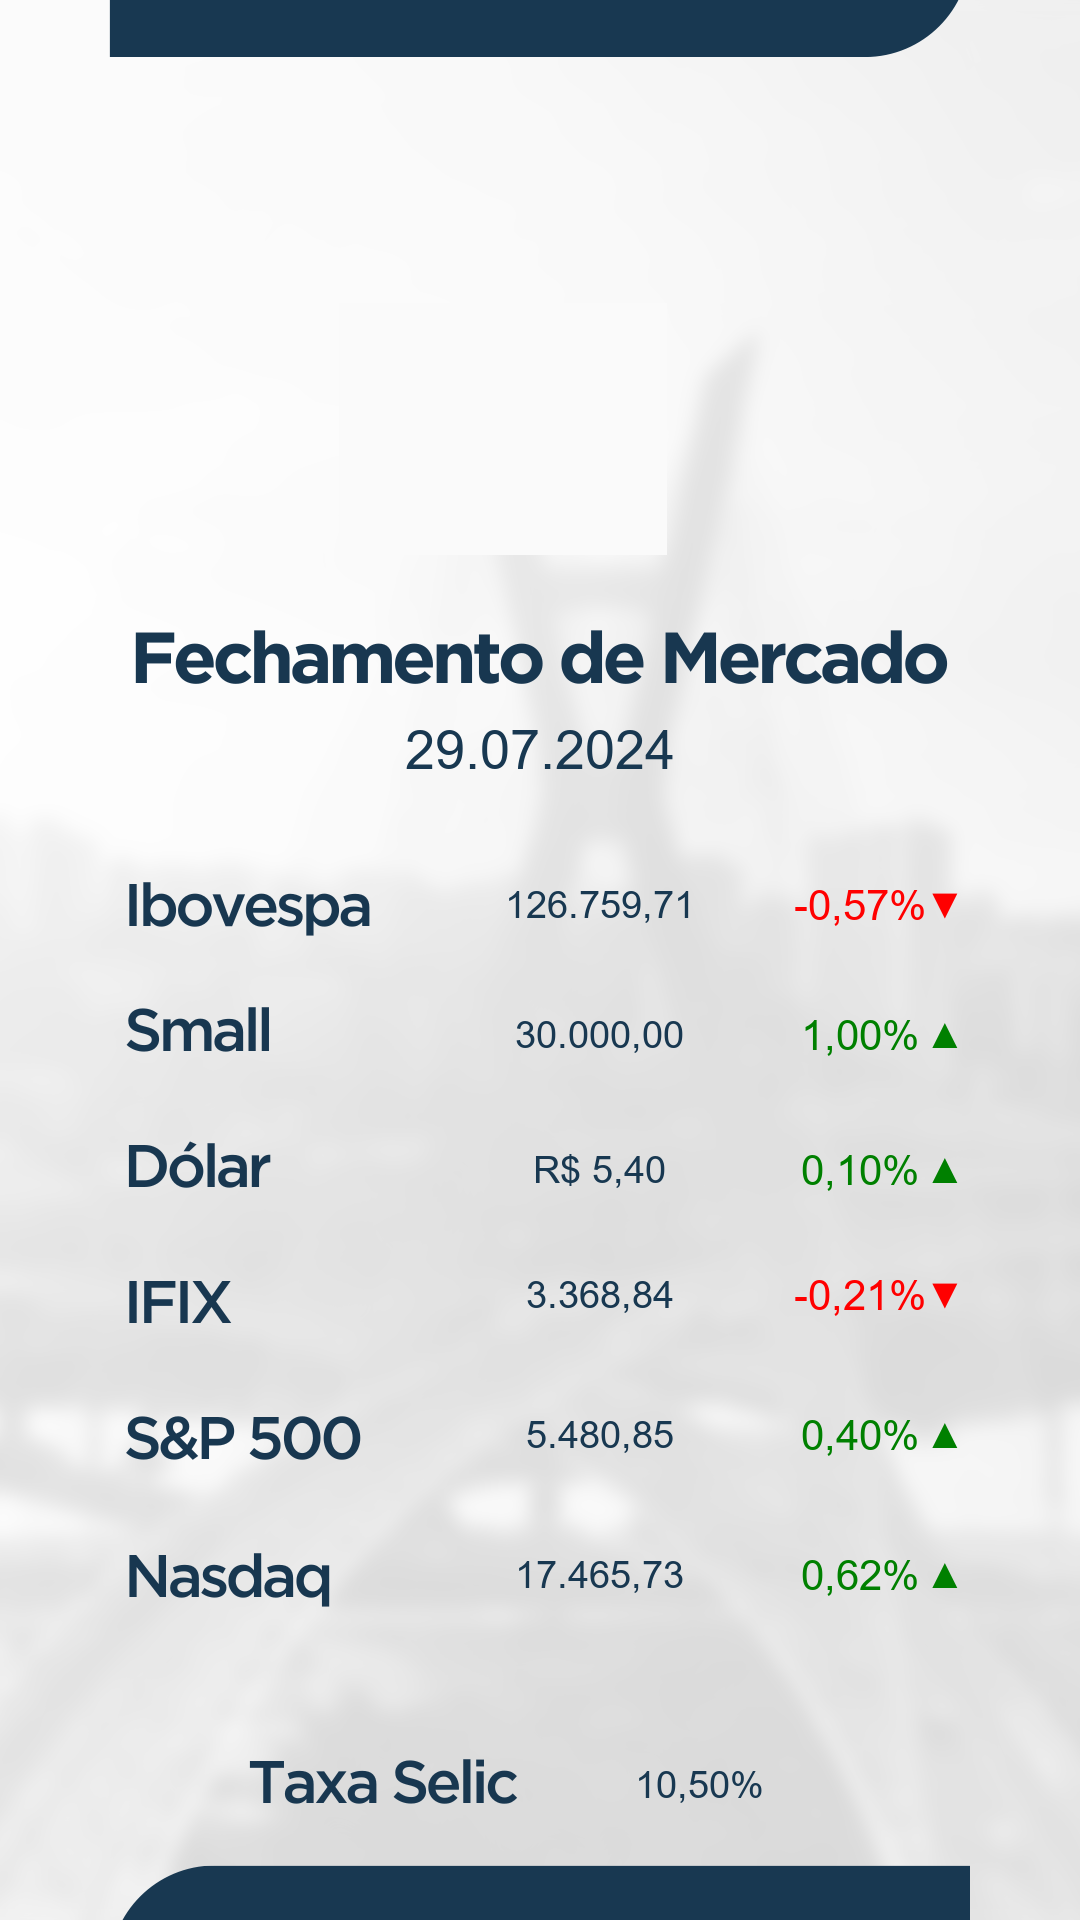

In [9]:
## Template
image_path = os.path.join(os.path.expanduser('~'), 'Documents')
img = Image.open(image_path + '\\Template_Fechamento.png')

## Parameters
font_text = 'arial'
font_size_values = 38
font_size_pct = 42
font_size_mov = 36
text_color = 'blue'


# Data
img = add_text_to_image(img, today, position=(540, 750),
                        font_text='arial',
                        font_size=54,
                        text_color=text_color)

## Ibov
img = add_text_to_image(img, ibov_last, position=(600, 905),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

img = add_text_to_image(img, ibov_pct, position=(860, 905),
                        font_text=font_text,
                        font_size=font_size_pct,
                        text_color=var_color(ibov_pct))

img = add_text_to_image(img, var_movement(ibov_pct), position=(945, 905),
                        font_text=font_text,
                        font_size=font_size_mov,
                        text_color=var_color(ibov_pct))

## Small
img = add_text_to_image(img, smll_last, position=(600, 1035),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

img = add_text_to_image(img, smll_pct, position=(860, 1035),
                        font_text=font_text,
                        font_size=font_size_pct,
                        text_color=var_color(smll_pct))

img = add_text_to_image(img, var_movement(smll_pct), position=(945, 1035),
                        font_text=font_text,
                        font_size=font_size_mov,
                        text_color=var_color(smll_pct))

## Dólar
img = add_text_to_image(img, dolar_last, position=(600, 1170),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

img = add_text_to_image(img, dolar_pct, position=(860, 1170),
                        font_text=font_text,
                        font_size=font_size_pct,
                        text_color=var_color(dolar_pct))

img = add_text_to_image(img, var_movement(dolar_pct), position=(945, 1170),
                        font_text=font_text,
                        font_size=font_size_mov,
                        text_color=var_color(dolar_pct))

## IFIX
img = add_text_to_image(img, ifix_last, position=(600, 1295),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

img = add_text_to_image(img, ifix_pct, position=(860, 1295),
                        font_text=font_text,
                        font_size=font_size_pct,
                        text_color=var_color(ifix_pct))

img = add_text_to_image(img, var_movement(ifix_pct), position=(945, 1295),
                        font_text=font_text,
                        font_size=font_size_mov,
                        text_color=var_color(ifix_pct))

## S&P 500
img = add_text_to_image(img, spx_last, position=(600, 1435),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

img = add_text_to_image(img, spx_pct, position=(860, 1435),
                        font_text=font_text,
                        font_size=font_size_pct,
                        text_color=var_color(spx_pct))

img = add_text_to_image(img, var_movement(spx_pct), position=(945, 1435),
                        font_text=font_text,
                        font_size=font_size_mov,
                        text_color=var_color(spx_pct))

## Nasdaq
img = add_text_to_image(img, nsdq_last, position=(600, 1575),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)

img = add_text_to_image(img, nsdq_pct, position=(860, 1575),
                        font_text=font_text,
                        font_size=font_size_pct,
                        text_color=var_color(nsdq_pct))

img = add_text_to_image(img, var_movement(nsdq_pct), position=(945, 1575),
                        font_text=font_text,
                        font_size=font_size_mov,
                        text_color=var_color(nsdq_pct))

## Selic
img = add_text_to_image(img, selic, position=(700, 1785),
                        font_text=font_text,
                        font_size=font_size_values,
                        text_color=text_color)


today = datetime.today().strftime('%Y%m%d')
img = img.convert("RGB")
img.save(image_path + '\Fechamento_' + today + '.png')
img